In [1]:
import pandas as pd

In [2]:
df_web_data = pd.read_csv('../CSV/df_web_data_combinado.csv')
df_experiment_clients = pd.read_csv('../CSV/df_final_experiment_clients.csv')
df_demo = pd.read_csv('../CSV/df_final_demo.csv')

In [27]:
df_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [3]:
# Columna 'date_time' a un formato datetime para realizar cálculos de tiempo
df_web_data['date_time'] = pd.to_datetime(df_web_data['date_time'])

In [4]:
# Verifico los pasos únicos en el proceso
process_steps_sum = df_web_data['process_step'].value_counts()

In [5]:
process_steps_sum 

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

In [6]:
# Tiempo empleado en cada paso - Ordeno los datos por cliente y tiempo para calcular diferencias de tiempo entre pasos
df_web_data = df_web_data.sort_values(by=['client_id', 'date_time'])

In [7]:
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
...,...,...,...,...,...
648533,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08
648532,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28
648531,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47
648530,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58


In [8]:
# Calculo la diferencia de tiempo entre los pasos consecutivos por cliente
df_web_data['time_diff'] = df_web_data.groupby('client_id')['date_time'].diff().dt.total_seconds()

In [9]:
# Combino los datos de variaciones del experimento (nuevo diseño vs anterior)
df_comb = df_web_data.merge(df_experiment_clients, on='client_id', how='left')

In [10]:
# Agrego los datos de los clientes
df_comb = df_comb.merge(df_demo, on='client_id', how='left')

In [11]:
df_comb

,client_id,visitor_id,visit_id,process_step,date_time,time_diff,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,NaN,NaN,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0
1,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,9.0,NaN,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0
2,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,46.0,NaN,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0
3,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,94.0,NaN,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0
4,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,64.0,NaN,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755400,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755401,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755402,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755403,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**TASA DE FINALIZACIÓN**

In [12]:
# Analizo las tasas de finalización según la variación (nuevo diseño vs anterior)
tasa_final = (
    df_comb.groupby('Variation')['process_step']
    .apply(lambda x: (x == 'confirm').sum() / len(x))
)

In [13]:
tasa_final

Variation
Control    0.122018
Test       0.144630
Name: process_step, dtype: float64

In [14]:
completed_count = df_web_data[df_web_data['process_step'] == 'confirm'].shape[0]
print(f"Registros con 'confirm': {completed_count}")

Registros con 'confirm': 102963


In [15]:
from statsmodels.stats.proportion import proportions_ztest

In [16]:
# Datos para la prueba estadística
control_data = df_comb[df_comb['Variation'] == 'Control']
test_data = df_comb[df_comb['Variation'] == 'Test']

In [17]:
# Calculo número de confirm y totales para cada grupo
control_success = (control_data['process_step'] == 'confirm').sum()
test_success = (test_data['process_step'] == 'confirm').sum()

In [18]:
control_total = len(control_data)
test_total = len(test_data)

In [19]:
# Aplico la prueba Z
success_counts = [control_success, test_success]
total_counts = [control_total, test_total]

In [20]:
z_stat, p_value = proportions_ztest(success_counts, total_counts)

z_stat, p_value

(-18.67324116863663, 8.173840595991908e-78)

In [21]:
# Tasas de finalización previamente calculadas
control_rate = tasa_final['Control']
test_rate = tasa_final['Test']

In [22]:
# Umbral esperado: 5% de incremento sobre la tasa de control
threshold = control_rate * 1.05

# Comparar la tasa de prueba con el umbral
significant_increase = test_rate >= threshold

In [23]:
# Mostrar resultados
{
    "Tasa de Control": control_rate,
    "Tasa de Test": test_rate,
    "Umbral del 5%": threshold,
    "Cumple el incremento del 5%": significant_increase
}

{'Tasa de Control': 0.12201837420362187,
 'Tasa de Test': 0.1446299347191687,
 'Umbral del 5%': 0.12811929291380297,
 'Cumple el incremento del 5%': True}

CONCLUSIONES

- Hay una diferencia significativa entre las tasas de finalización del grupo de control y el grupo de test.

- Esto respalda que el diseño nuevo tiene un mejor rendimiento en tasa de finalización.

- La tasa de test supera tanto la tasa de control como el umbral del 5% de mejora esperado.

- El nuevo diseño es significativamente mejor que el diseño anterior y cumple con los criterios establecidos.


In [24]:
# Calculo el tiempo promedio empleado por variación
media_tiempo_paso = df_comb.groupby('Variation')['time_diff'].mean()


In [25]:
media_tiempo_paso

Variation
Control    84391.302993
Test       71515.006263
Name: time_diff, dtype: float64

**METRICAS DE DESEMPEÑO**

In [26]:
# Ordena los datos para garantizar un cálculo correcto de tiempos
df_web_data_ordenado = df_web_data.sort_values(by=['client_id', 'date_time'])


# Agrupo por cliente
client_metrics = df_web_data_ordenado.groupby('client_id').agg(
    total_steps=('process_step', 'count'), # Número total de pasos completados
    completed=('process_step', lambda x: int('confirm' in x.values)), # Si el flujo tiene 'confirm'
    total_time=('date_time', lambda x: (x.max() - x.min()).total_seconds()) # Tiempo total del flujo (diferencia entre el primer y último paso
).reset_index()

KeyboardInterrupt: 

In [28]:
# Calculo la tasa de finalización general
completion_rate = client_metrics['completed'].mean()

In [29]:
# Calculo el tiempo promedio por paso en flujos completos
time_per_step_completed = (
    client_metrics[client_metrics['completed'] == 1]['total_time'] /
    client_metrics[client_metrics['completed'] == 1]['total_steps']
).mean()

In [31]:
{"Tasa de Finalización General": completion_rate,
"Tiempo Promedio por Paso en Flujos Completos": time_per_step_completed}

{'Tasa de Finalización General': 0.6753247834083741,
 'Tiempo Promedio por Paso en Flujos Completos': 31882.039465351827}

COMENTARIOS
- El 67.5% de los clientes lograron completar llegando a paso confirm.

- En promedio, los clientes que completaron el flujo tardaron alrededor de 8.86 horas por paso. Esto puede indicar una pausa prolongada entre pasos (como usuarios que regresan más tarde a completar el testo o que tenemos unos outliers que dispersan mucho los datos.

*Analizo distribuciones de tiempo y voy a intentar identificar outliers*

In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Filtro flujos completados
completed_flows = client_metrics[client_metrics['completed'] == 1]

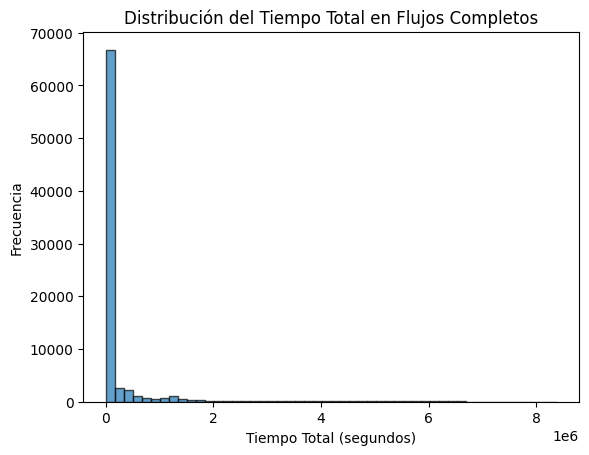

In [35]:
# Visualizar la distribución del tiempo total del flujo
plt.hist(completed_flows['total_time'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribución del Tiempo Total en Flujos Completos')
plt.xlabel('Tiempo Total (segundos)')
plt.ylabel('Frecuencia')
plt.show()

In [36]:
# Calcular estadísticas clave
time_stats = completed_flows['total_time'].describe(percentiles=[0.25, 0.5, 0.75])
print("Estadísticas clave de tiempo total:\n", time_stats)

Estadísticas clave de tiempo total:
 count    8.114500e+04
mean     2.912633e+05
std      9.450367e+05
min      0.000000e+00
25%      1.830000e+02
50%      3.480000e+02
75%      1.573000e+03
max      8.373949e+06
Name: total_time, dtype: float64


In [39]:
# Identificar outliers usando IQR
Q1 = time_stats['25%']
Q3 = time_stats['75%']
IQR = Q3 - Q1
outliers = completed_flows[(completed_flows['total_time'] < Q1 - 1.5 * IQR) |
                            (completed_flows['total_time'] > Q3 + 1.5 * IQR)]

In [41]:
print(f"Outliers detectados: {len(outliers)} registros")

Outliers detectados: 18686 registros


In [42]:
# Analizo los outliers
# Divido los datos en normales y outliers:

normal_flows = completed_flows[
    (completed_flows['total_time'] >= Q1 - 1.5 * IQR) &
    (completed_flows['total_time'] <= Q3 + 1.5 * IQR)
]

outlier_flows = completed_flows[
    (completed_flows['total_time'] < Q1 - 1.5 * IQR) |
    (completed_flows['total_time'] > Q3 + 1.5 * IQR)
]

In [43]:
# Métricas sin outliers
normal_stats = normal_flows['total_time'].describe(percentiles=[0.25, 0.5, 0.75])

print("Estadísticas clave sin outliers:\n", normal_stats)

Estadísticas clave sin outliers:
 count    62459.000000
mean       391.026818
std        416.454331
min          0.000000
25%        158.000000
50%        256.000000
75%        450.000000
max       3655.000000
Name: total_time, dtype: float64


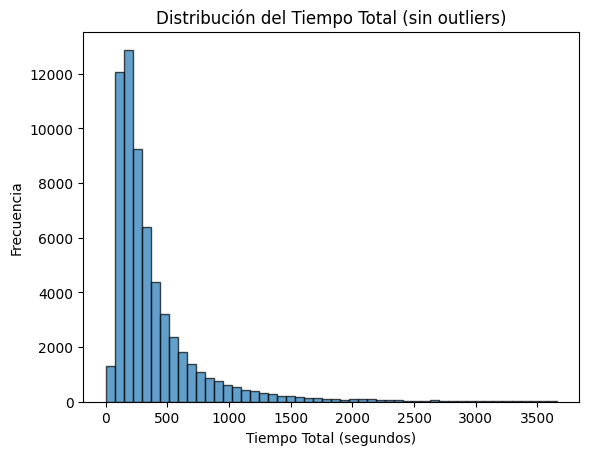

In [44]:
# Visualizo los datos sin outliers
plt.hist(normal_flows['total_time'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribución del Tiempo Total (sin outliers)')
plt.xlabel('Tiempo Total (segundos)')
plt.ylabel('Frecuencia')
plt.show()

In [45]:
mean_with_outliers = completed_flows['total_time'].mean()
mean_without_outliers = normal_flows['total_time'].mean()

print({
    "Promedio con outliers": mean_with_outliers,
    "Promedio sin outliers": mean_without_outliers
})

{'Promedio con outliers': 291263.29299402307, 'Promedio sin outliers': 391.0268175923406}


**CONCLUSIONES**
- Impacto de los outliers: Los tiempos extremos distorsionan significativamente el promedio, haciendo que parezca que los usuarios tardan mucho más.
- Datos sin outliers: Excluir estos  nos da una visión mucho más clara y útil del comportamiento típico de los usuarios.